Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2147 - val_loss: 0.1613
Epoch 2/50
Save the image
60000/60000 [==============================] - 6s 102us/step - loss: 0.1510 - val_loss: 0.1431
Epoch 3/50
60000/60000 [==============================] - 5s 90us/step - loss: 0.1370 - val_loss: 0.1325
Epoch 4/50
Save the image
60000/60000 [==============================] - 6s 99us/step - loss: 0.1296 - val_loss: 0.1298
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1252 - val_loss: 0.1202
Epoch 6/50
Save the image
60000/60000 [==============================] - 6s 100us/step - loss: 0.1221 - val_loss: 0.1179
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.1195 - val_loss: 0.1180
Epoch 8/50
Save the image
60000/60000 [==============================] - 6s 101us/step - loss: 0.1174 - val_loss: 0.1157
Epoch 9/50
60000/60000 [=======================

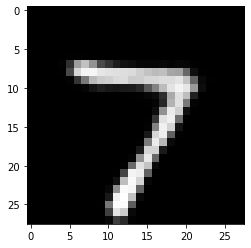

In [14]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf 
import cv2
import os


input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format


for i in range(1,2):
    ## Build the Convolution autoencoders model

    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)



    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    from keras.datasets import mnist
    import numpy as np

    (x_train, _), (x_test, _) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
    x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

    from keras.callbacks import TensorBoard

    
    

    class CustomSaver(tf.keras.callbacks.Callback):
        def on_epoch_begin(self, epoch, logs={}):
            #save_decoded_imgs = []
            
            loop = epoch + 1
            
            if loop%2 == 0:  # or save after some epoch, each k-th epoch etc.
                print('Save the image')
                decoded_imgs = autoencoder.predict(x_test)
                img = decoded_imgs[0]
                img = img.reshape(28,28)
                
                # save the img
                current_dir = os.getcwd()
                plt.imshow(img,'gray')
                plt.savefig(current_dir+'/Decoded_img/Decoded_image_epoch'+str(loop)+'.png')


    saver = CustomSaver()
    
    result = autoencoder.fit(x_train, x_train,
                                        epochs=50,
                                        batch_size=128,
                                        shuffle=True,
                                        validation_data=(x_test, x_test),
                                        callbacks=[saver,TensorBoard(log_dir='/tmp/autoencoder')])
    
    


#print(autoencoder.summary())




#decoded_images = autoencoder.predict(x_test)

In [ ]:
'''
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
'''



In [15]:
decoded_imgs = autoencoder.predict(x_test)


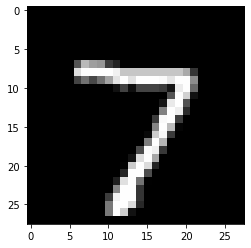

In [16]:
b = x_test[0]
b = b.reshape(28,28)

#plt.imsave('output.png',b)
plt.imshow(b,'gray')
#cv2.imwrite('output.png', b)


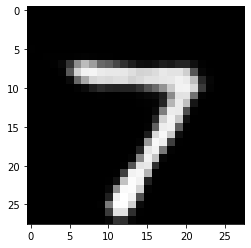

In [17]:
decoded_imgs.shape
a = decoded_imgs[0]
a = a.reshape(28,28)
plt.imshow(a,'gray')

In [18]:
autoencoder.save('my_model.h5')

In [19]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

new_model = tf.keras.models.load_model('my_model.h5')

In [20]:
print(new_model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 8)           0   

In [21]:
current_dir = os.getcwd()

test_img = cv2.imread('test1.png',cv2.IMREAD_GRAYSCALE)
test_img.shape


(225, 225)

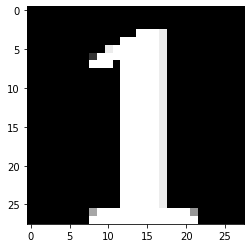

In [22]:
#Do scale
test_img = abs(255-test_img)
test_img = test_img/255

#change the input shape
new_img = cv2.resize(test_img,(28, 28))
new_img.shape
plt.imshow(new_img,cmap='gray')

new_img1 = new_img.reshape(1,28,28,1) 


In [23]:
new_img1.shape

(1, 28, 28, 1)

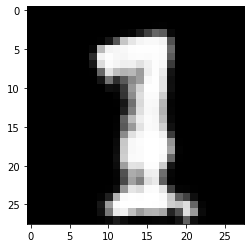

In [26]:
pred = new_model.predict(new_img1)

output = pred.reshape(28,28) 

plt.imshow(output,cmap='gray')

'/usr/bin/python3'